In [1]:
import datetime
import pyproj
import numpy as np
from sklearn.cluster import DBSCAN

from spatial_data_mining_functions import read_data, plot_nb_dists, plot_cluster, plot_cluster_interactive, export_to_shp

In [2]:
# Path to geodatabase
input_file = r"input_data/taxi_21.txt"

# Source projection
proj_wgs84 = "EPSG:4326"

# Target protection
proj_target = "EPSG:25833"

In [3]:
def transform(data_in):
    """Function that transforms data to metric coordinate system and continuous timestamps."""
    data_out = []    
    t_reference = datetime.datetime(2014, 1, 1)
    transformer = pyproj.Transformer.from_crs(proj_wgs84, proj_target, always_xy=True)

    # Iterate over every point in the input data.
    for d in data_in:
        x = d[0]
        y = d[1]
        ts = d[2]

        x, y = transformer.transform(x, y)
        ts = ((ts-t_reference).total_seconds())/60

        data_out.append([x, y, ts])
    return data_out

In [4]:
def clustering_with_dbscan(X, eps=15, min_samples=5, metric='cityblock'):
    """ Function derived from scipy dbscan example
    http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#example-cluster-plot-dbscan-py."""

    X = np.array(data)

    # Compute DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(X)
    
    labels = db.labels_
    core_samples_indices = db.core_sample_indices_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    return labels, core_samples_indices

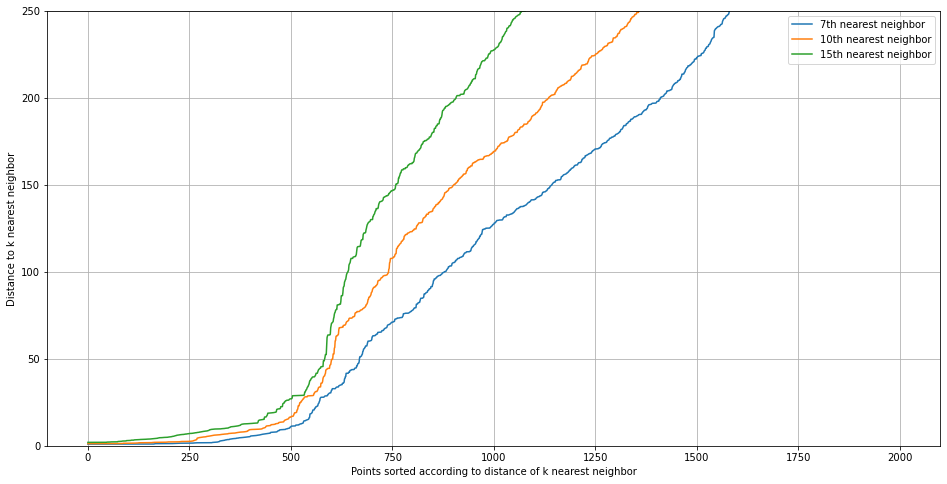

Estimated number of clusters: 17


Map(center=[41.89, 12.46], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [5]:
# Read data, limit number of rows for speed.
org_data = read_data(input_file, 2000)

# Apply transformations.
data = transform(org_data)

# Plot nearest neighbor distances diagram.
metric = 'euclidean'
data = np.array(data)
plot_nb_dists(data, nearest_neighbor=[7, 10, 15], metric=metric, ylim=250)

# Calculate clusters with dbscan.
eps = 5
min_samples = 10
labels, core_samples_indices = clustering_with_dbscan(data, eps=eps, min_samples=min_samples, metric=metric)

# Export clusters to geodatabase.
export_layer_name = "stops"
export_to_shp(data, labels, export_layer_name, crs=proj_target)

# Plot clusters. Use the first function to plot a static map.
# plot_cluster(data, labels, core_samples_indices, proj_wgs84=proj_wgs84, proj_target=proj_target, linestyle='solid')
plot_cluster_interactive(data, labels, core_samples_indices, proj_wgs84=proj_wgs84, proj_target=proj_target)